In [1]:
import pandas as pd
import os

In [2]:
files = [file for file in os.listdir("SalesAnalysis/Sales_Data")]
all_data = pd.DataFrame()
for file in files:
    all_data = pd.concat([pd.read_csv(f"SalesAnalysis/Sales_Data/{file}"), all_data])

In [3]:
all_data.to_csv("Sales.csv", index=False)

In [4]:
df = pd.read_csv("Sales.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [15]:
df.isna().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [16]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185230,NaN,NaN,NaN,NaN,NaN,NaN
185379,NaN,NaN,NaN,NaN,NaN,NaN
185527,NaN,NaN,NaN,NaN,NaN,NaN
185913,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df.dropna(inplace=True)

In [156]:
df.loc[~df["Order Date"].str.match(r"\d{2}/\d{2}/\d{2} \d{2}:\d{2}", na= False), "Order Date"] = ""

In [157]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M")

In [158]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035"


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [ ]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
6204,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
8338,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
8644,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
9325,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
9502,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [162]:
df.dropna(inplace=True)

In [165]:
df["Month"] = df["Order Date"].dt.month
df["Year"] = df["Order Date"].dt.year

In [166]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019
...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Year              185950 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 11.3+ MB


In [189]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Price Each"] = df["Price Each"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Year              185950 non-null  int32         
 8   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 12.1+ MB


In [180]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [181]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,11.95
...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019,3.84
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019,3.84


In [192]:
df.groupby("Month")["Sales"].sum().sort_values()

Month
1     1822256.73
9     2097560.13
2     2202022.42
8     2244467.88
6     2577802.26
7     2647775.76
3     2807100.38
5     3152606.75
11    3199603.20
4     3390670.24
10    3736726.88
12    4613443.34
Name: Sales, dtype: float64

<Axes: title={'center': 'Sales by Month'}, xlabel='Month', ylabel='Sales'>

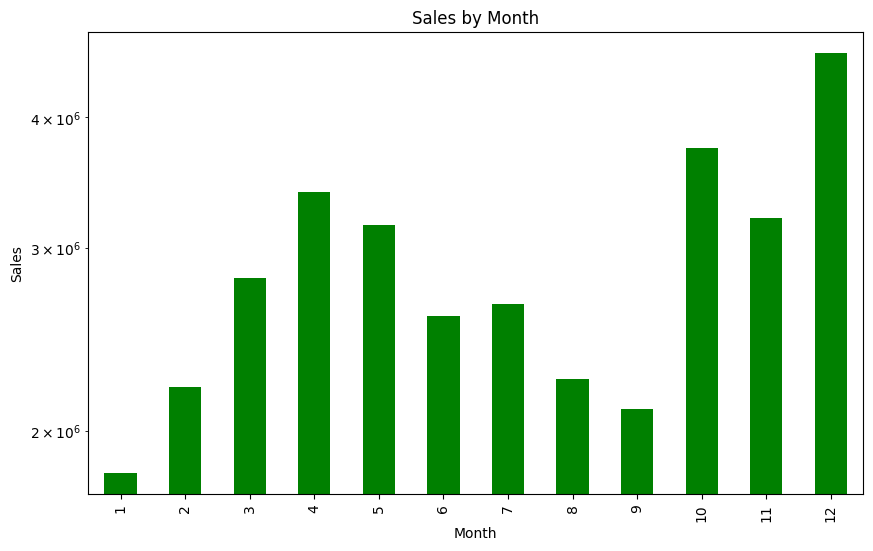

In [207]:
df.groupby("Month")["Sales"].sum().plot(kind= "bar", figsize= (10,6), color= "green", xlabel= "Month", ylabel= "Sales", title= "Sales by Month", logy= True)

In [208]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,11.95
...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019,3.84
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019,3.84


In [257]:
df["City"] = df["Purchase Address"].str.extract(r",\s*(\D+),")
df["City"] = df["Purchase Address"].apply(lambda x : x.split(",")[1].strip())
df["State"] = df["Purchase Address"].str.extract(r",\s*\D+,\s*(\D+)")

In [259]:
df.groupby(["City","State"])["Sales"].sum().sort_values()

City           State
Portland       ME        449758.27
Austin         TX       1819581.75
Portland       OR       1870732.34
Seattle        WA       2747755.48
Dallas         TX       2767975.40
Atlanta        GA       2795498.58
Boston         MA       3661642.01
New York City  NY       4664317.43
Los Angeles    CA       5452570.80
San Francisco  CA       8262203.91
Name: Sales, dtype: float64

<Axes: title={'center': 'Sales by City'}, xlabel='City, ', ylabel='Sales'>

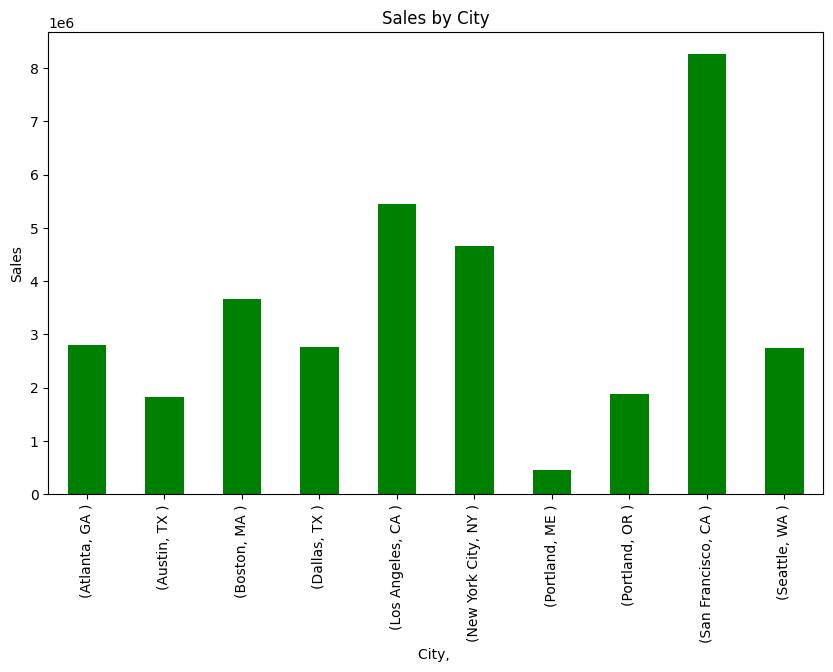

In [263]:
df.groupby(["City", "State"])["Sales"].sum().plot(kind= "bar", figsize= (10,6), color= "green", xlabel= "City, ", ylabel= "Sales", title= "Sales by City")

In [301]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,State
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles,CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin,TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles,CA
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle,WA
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta,GA
...,...,...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles,CA
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin,TX
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco,CA
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland,OR


In [303]:
df.groupby(df["Order Date"].dt.hour)["Sales"].sum().index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='Order Date')

In [304]:
hour_labels = [
    "12 am" if hour == 0 else
    "12 pm" if hour == 12 else
    f"{hour} am" if hour < 12 else
    f"{hour % 12} pm"
    for hour in df.groupby(df["Order Date"].dt.hour)["Sales"].sum().index
]

pd.DataFrame({"Hour": hour_labels, "Sales": df.groupby(df["Order Date"].dt.hour)["Sales"].sum().values})

,Hour,Sales
0,12 am,713721.27
1,1 am,460866.88
2,2 am,234851.44
3,3 am,145757.89
4,4 am,162661.01
5,5 am,230679.82
6,6 am,448113.00
7,7 am,744854.12
8,8 am,1192348.97
9,9 am,1639030.58


[Text(0, 0, '12 am'),
 Text(1, 0, '1 am'),
 Text(2, 0, '2 am'),
 Text(3, 0, '3 am'),
 Text(4, 0, '4 am'),
 Text(5, 0, '5 am'),
 Text(6, 0, '6 am'),
 Text(7, 0, '7 am'),
 Text(8, 0, '8 am'),
 Text(9, 0, '9 am'),
 Text(10, 0, '10 am'),
 Text(11, 0, '11 am'),
 Text(12, 0, '12 pm'),
 Text(13, 0, '1 pm'),
 Text(14, 0, '2 pm'),
 Text(15, 0, '3 pm'),
 Text(16, 0, '4 pm'),
 Text(17, 0, '5 pm'),
 Text(18, 0, '6 pm'),
 Text(19, 0, '7 pm'),
 Text(20, 0, '8 pm'),
 Text(21, 0, '9 pm'),
 Text(22, 0, '10 pm'),
 Text(23, 0, '11 pm')]

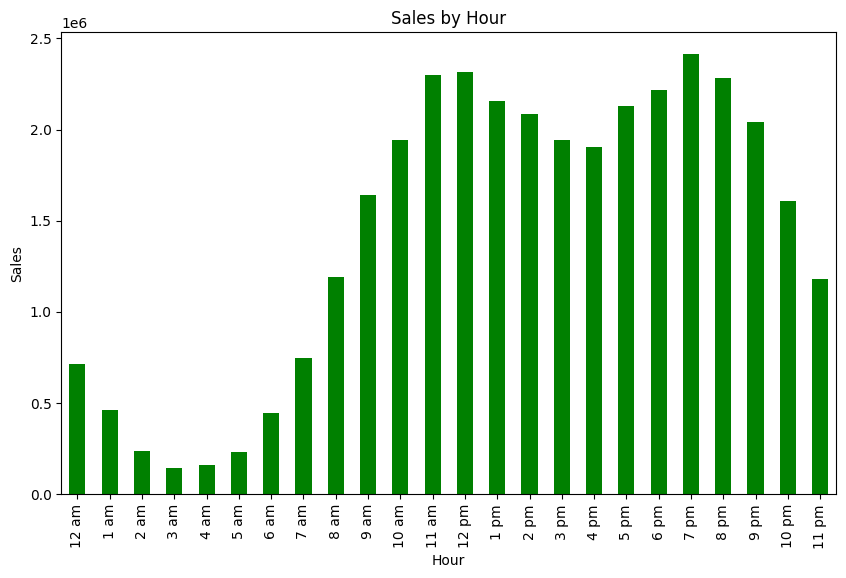

In [306]:
df.groupby(df["Order Date"].dt.hour)["Sales"].sum().plot(kind="bar", figsize=(10, 6), color="green", title="Sales by Hour", xlabel= "Hour", ylabel= "Sales").set_xticklabels([
    "12 am" if hour == 0 else
    "12 pm" if hour == 12 else
    f"{hour} am" if hour < 12 else
    f"{hour % 12} pm"
    for hour in df.groupby(df["Order Date"].dt.hour)["Sales"].sum().index
], rotation=90)


In [307]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,State
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles,CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin,TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles,CA
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle,WA
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta,GA
...,...,...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles,CA
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin,TX
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco,CA
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland,OR


In [328]:
df[df["Order ID"].duplicated(keep=False)].groupby("Order ID")["Product"].agg(list)

Order ID
141275             [USB-C Charging Cable, Wired Headphones]
141290    [Apple Airpods Headphones, AA Batteries (4-pack)]
141365                  [Vareebadd Phone, Wired Headphones]
141384                 [Google Phone, USB-C Charging Cable]
141450           [Google Phone, Bose SoundSport Headphones]
                                ...                        
319536               [Macbook Pro Laptop, Wired Headphones]
319556                     [Google Phone, Wired Headphones]
319584                           [iPhone, Wired Headphones]
319596                   [iPhone, Lightning Charging Cable]
319631    [34in Ultrawide Monitor, Lightning Charging Ca...
Name: Product, Length: 7136, dtype: object

In [330]:
df.groupby("Product")["Sales"].sum()

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64

<Axes: title={'center': 'Sales by Product'}, xlabel='Product, ', ylabel='Sales'>

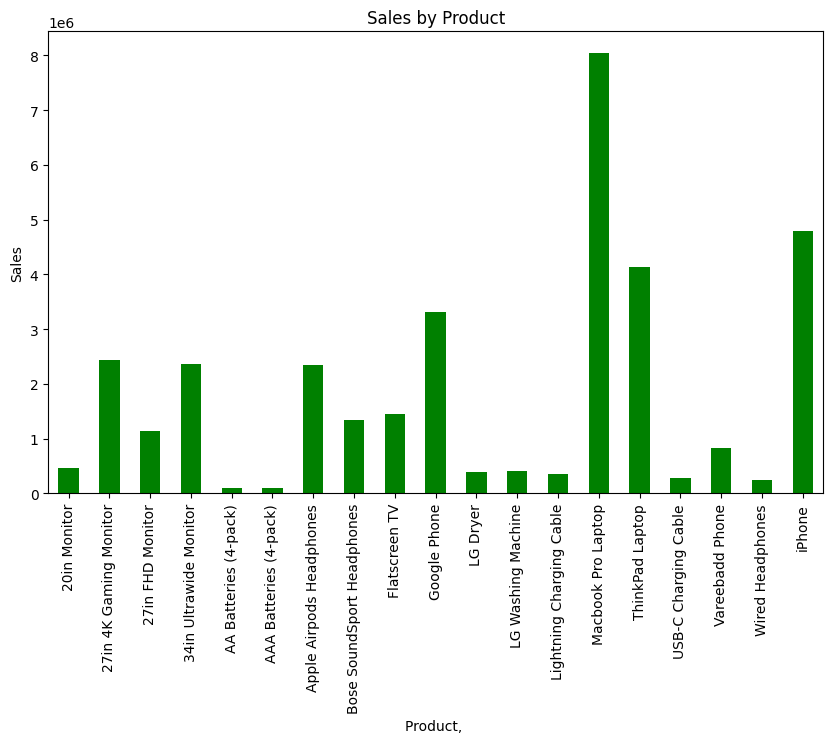

In [332]:
df.groupby("Product")["Sales"].sum().plot(kind= "bar", figsize= (10,6), color= "green", xlabel= "Product, ", ylabel= "Sales", title= "Sales by Product")